In [1]:
import pandas as pd
import numpy as np

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('PB_All_2000_2021.csv', sep = ';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [4]:
df.shape

(2861, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [6]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [8]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [10]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [11]:
pollutants = ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

In [12]:
df = df.dropna(subset = pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [13]:
df.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

In [14]:
x = df[['id', 'year']]
y = df[pollutants]

In [15]:
x_encoded = pd.get_dummies(x, columns=['id'], drop_first=True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [17]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(x_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [18]:
y_pred = model.predict(x_test)

In [19]:
print("Model Performace on the test data:")
for i, pollutant in enumerate(pollutants):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{pollutant}: \n MSE = {mse:.4f} \n R2 = {r2:.4f}")

Model Performace on the test data:
NH4: 
 MSE = 0.8827 
 R2 = 0.7802
BSK5: 
 MSE = 5.3109 
 R2 = 0.1910
Suspended: 
 MSE = 98.1778 
 R2 = 0.2050
O2: 
 MSE = 13.9559 
 R2 = 0.0538
NO3: 
 MSE = 20.4049 
 R2 = 0.4846
NO2: 
 MSE = 10.3434 
 R2 = -58.2039
SO4: 
 MSE = 2275.8074 
 R2 = 0.4482
PO4: 
 MSE = 0.2439 
 R2 = 0.4359
CL: 
 MSE = 32661.4374 
 R2 = 0.7526


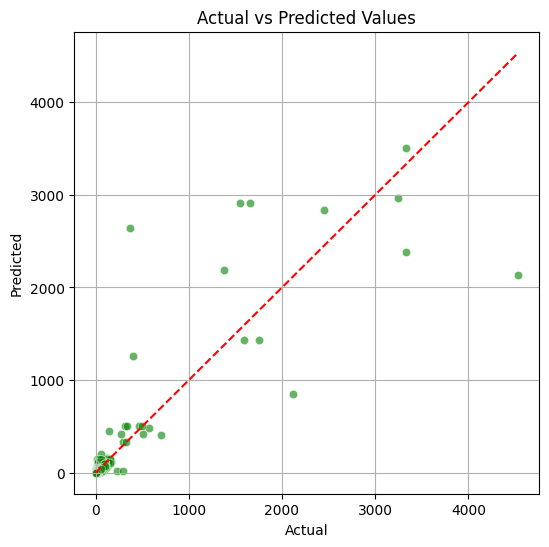

In [20]:
# Additional visualization of actual vs predicted values
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color="green", alpha=0.6)
plt.plot([min(y_test_flat), max(y_test_flat)],
         [min(y_test_flat), max(y_test_flat)],
         '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [21]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})  
input_encoded = pd.get_dummies(input_data, columns=['id'])

missing_cols = set(x_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[x_encoded.columns]

predicted_pollutants = model.predict(input_encoded)[0]

print(f"Predicted pollutant levels for station {station_id} in {year_input}:")
for pollutant, value in zip(pollutants, predicted_pollutants):
    print(f"{pollutant}: {value:.2f}")

Predicted pollutant levels for station 22 in 2024:
NH4: 0.03
BSK5: 2.57
Suspended: 5.69
O2: 13.25
NO3: 6.93
NO2: 0.07
SO4: 144.84
PO4: 0.46
CL: 67.36


In [ ]:
# After predicting pollutants, add compliance checks using the Parameters
limits = {
    'NH4': 0.5, 'BSK5': 3, 'Suspended': 25, 'O2': 5, 
    'NO3': 10, 'NO2': 0.1, 'SO4': 250, 'PO4': 0.1, 'CL': 250
}

for pollutant, pred in zip(pollutants, predicted_pollutants):
    safe = "✅" if pred <= limits.get(pollutant, float('inf')) else "❌"
    print(f"{pollutant}: {pred:.2f} mg/L {safe} (Limit: {limits.get(pollutant, 'N/A')} mg/L)")

NH4: 0.03 mg/L ✅ (Limit: 0.5 mg/L)
BSK5: 2.57 mg/L ✅ (Limit: 3 mg/L)
Suspended: 5.69 mg/L ✅ (Limit: 25 mg/L)
O2: 13.25 mg/L ❌ (Limit: 5 mg/L)
NO3: 6.93 mg/L ✅ (Limit: 10 mg/L)
NO2: 0.07 mg/L ✅ (Limit: 0.1 mg/L)
SO4: 144.84 mg/L ✅ (Limit: 250 mg/L)
PO4: 0.46 mg/L ❌ (Limit: 0.1 mg/L)
CL: 67.36 mg/L ✅ (Limit: 250 mg/L)


In [25]:
def classify_water_safety(predicted_values, pollutants):
    # Safety thresholds
    human_limits = {
        'NH4': 0.5, 'NO3': 50, 'NO2': 0.1, 
        'SO4': 250, 'CL': 250
    }
    fish_limits = {
        'NH4': 0.5, 'BSK5': 3, 'Suspended': 25, 
        'O2': 5, 'NO2': 0.1, 'PO4': 0.1, 'CL': 230
    }
    
    # Initialize safety flags
    safe_for_humans = True
    safe_for_fish = True
    unsafe_params_humans = []
    unsafe_params_fish = []
    
    # Check each pollutant
    for pollutant, value in zip(pollutants, predicted_values):
        if pollutant in human_limits and value > human_limits[pollutant]:
            safe_for_humans = False
            unsafe_params_humans.append(pollutant)
        if pollutant in fish_limits:
            if (pollutant == 'O2' and value < fish_limits[pollutant]) or \
               (pollutant != 'O2' and value > fish_limits[pollutant]):
                safe_for_fish = False
                unsafe_params_fish.append(pollutant)
    
    # Generate report
    report = {
        "Safe for humans": safe_for_humans,
        "Unsafe parameters (humans)": unsafe_params_humans,
        "Safe for fish": safe_for_fish,
        "Unsafe parameters (fish)": unsafe_params_fish
    }
    return report

safety_report = classify_water_safety(predicted_pollutants, pollutants)
print("Water Safety Assessment:")
for key, value in safety_report.items():
    print(f"- {key}: {value}")

Water Safety Assessment:
- Safe for humans: True
- Unsafe parameters (humans): []
- Safe for fish: False
- Unsafe parameters (fish): ['PO4']


In [24]:
import joblib
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(x_encoded.columns.tolist(), 'model_columns.pkl')
print("Model and columns structure are saved.")

Model and columns structure are saved.
